# Exploratory Data Analysis (EDA) with Python on Pakistan Employment Dataset
Author: Mehirban Ali\
Date: January 18, 2026

# About Dataset
By: MuqadasEjaz and 8 collaborators\
Dataset Description\
This dataset provides detailed employment and demographic statistics for districts across Pakistan, with a strong focus on regional and gender-based insights. It includes key labor market indicators such as employment rates, labor force participation, working-age population, and literacy rates, enabling a comprehensive analysis of Pakistan’s socio-economic conditions.

With 4,730 rows and 8 columns, the dataset supports in-depth analysis of employment patterns across provinces, divisions, and districts, making it useful for socio-economic research, policy evaluation, and data-driven decision-making.
BY: MuqadasEjaz and 8 collaborators

# Key Features
Province\
The administrative province within Pakistan.

Division\
The administrative subdivision of a province.

District\
The specific geographic district within a division.

Indicator\
Represents various socio-economic and labor market indicators, including total population, employment rate, labor force size, working-age population, literacy rate, and gender-specific employment metrics.

Area Type\
Distinguishes between urban and rural areas within each district.

Total\
The combined value of the selected indicator, typically aggregating both male and female data.

Male\
Gender-specific data representing male population or employment values.

Female\
Gender-specific data representing female population or employment values.

In [2]:
# Import Liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load the dataset with name data.csv
data = pd.read_csv('data.csv')
# Display the first few rows of the dataset
data.head()

,Province,Division,District,Indicator,Area Type,Total,Male,Female
0,Balochistan,Kalat Division,Kalat,Working Age Population,Rural,130000,70000,59000
1,Balochistan,Kalat Division,Kalat,Working Age Population,Urban,28000,17000,12000
2,Balochistan,Kalat Division,Kalat,Labour Force,Rural,52600,49600,3100
3,Balochistan,Kalat Division,Kalat,Labour Force,Urban,10800,10600,300
4,Balochistan,Kalat Division,Kalat,Employed,Rural,49700,47400,2300


In [4]:
# Display the last few rows of the dataset
data.tail()

,Province,Division,District,Indicator,Area Type,Total,Male,Female
4725,Sindh,Hyderabad Division,Matiri,Total Population,Urban,182669,94445,88207
4726,Sindh,Banbhore Division,Thattah,Total Population,Rural,654818,340701,314105
4727,Sindh,Banbhore Division,Thattah,Total Population,Urban,176476,90900,85556
4728,Balochistan,Quetta Division,Lorali,Total Population,Rural,332532,176186,156332
4729,Balochistan,Quetta Division,Lorali,Total Population,Urban,64891,36316,28573


In [5]:
# Get summary information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Province   4730 non-null   object
 1   Division   4730 non-null   object
 2   District   4730 non-null   object
 3   Indicator  4730 non-null   object
 4   Area Type  4730 non-null   object
 5   Total      4730 non-null   object
 6   Male       4730 non-null   object
 7   Female     4730 non-null   object
dtypes: object(8)
memory usage: 295.8+ KB


The above information shows that there are 4,730 rows and 8 columns in the dataset.
what I observed that Total, Male and Female columns are numerical but here its data type is object. So I have to convert them into numerical data type.Also the Non-Null Count column in the above table shows that there is no missing value in any column.

In [6]:
# we will convert the data type of Total, Male and Female columns to numeric
data[['Total','Male','Female']] = data[['Total','Male','Female']].apply(pd.to_numeric, errors='coerce')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Province   4730 non-null   object 
 1   Division   4730 non-null   object 
 2   District   4730 non-null   object 
 3   Indicator  4730 non-null   object 
 4   Area Type  4730 non-null   object 
 5   Total      4407 non-null   float64
 6   Male       4387 non-null   float64
 7   Female     3985 non-null   float64
dtypes: float64(3), object(5)
memory usage: 295.8+ KB


Now we can see that the data types of the Total, Male, and Female columns have been successfully converted to numeric. This will allow us to perform numerical analyses and visualizations on these columns without any issues.

In [7]:
data.head()

,Province,Division,District,Indicator,Area Type,Total,Male,Female
0,Balochistan,Kalat Division,Kalat,Working Age Population,Rural,130000.0,70000.0,59000.0
1,Balochistan,Kalat Division,Kalat,Working Age Population,Urban,28000.0,17000.0,12000.0
2,Balochistan,Kalat Division,Kalat,Labour Force,Rural,52600.0,49600.0,3100.0
3,Balochistan,Kalat Division,Kalat,Labour Force,Urban,10800.0,10600.0,300.0
4,Balochistan,Kalat Division,Kalat,Employed,Rural,49700.0,47400.0,2300.0


# Descriptive statistics

In [8]:
# Get statistical summary of the dataset
data.describe()

,Total,Male,Female
count,4.407000e+03,4.387000e+03,3.985000e+03
mean,1.188150e+05,6.917670e+04,5.526378e+04
std,4.250460e+05,2.327951e+05,2.096934e+05
min,1.000000e-01,1.000000e-01,0.000000e+00
25%,2.470000e+01,2.565000e+01,1.620000e+01
50%,4.740000e+01,5.860000e+01,4.590000e+01
75%,6.900000e+03,5.200000e+03,2.400000e+03
max,1.111998e+07,5.813987e+06,5.303982e+06


In [9]:
# statistics for categorical columns
data.describe(include=['object'])

,Province,Division,District,Indicator,Area Type
count,4730,4730,4730,4730,4730
unique,4,30,131,20,3
top,Punjab,Quetta Division,Qilla Abdullah,Total Population,Rural
freq,1334,400,38,276,2103


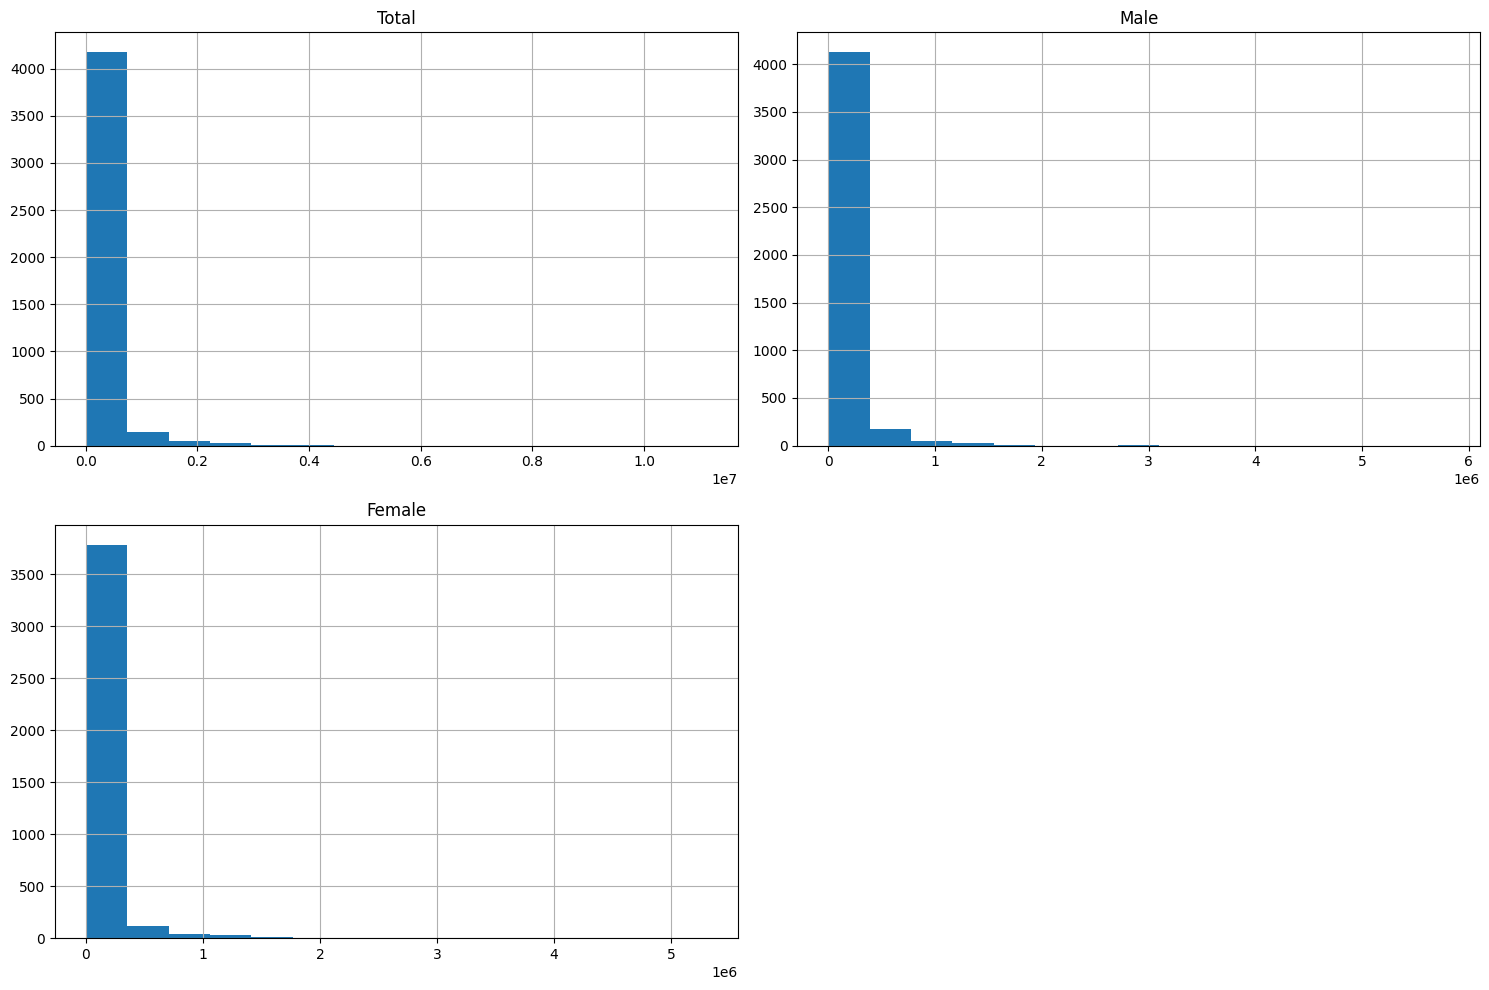

In [10]:
# histogram for all numerical columns
data.hist(bins=15, figsize=(15, 10))
plt.tight_layout()  
plt.show()

From the histograms, we can observe the distribution of values for the numerical columns: Total, Male, and Female. The distributions appear to be right-skewed, indicating that there are a few districts with very high employment figures compared to the majority. This suggests that while most districts have moderate employment levels, there are some outliers with significantly higher employment numbers.    


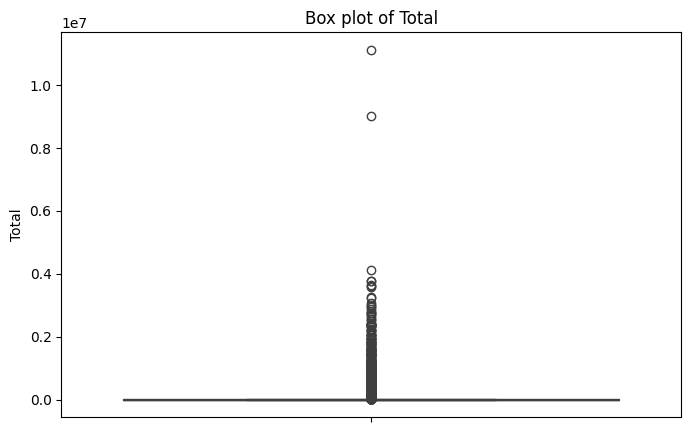

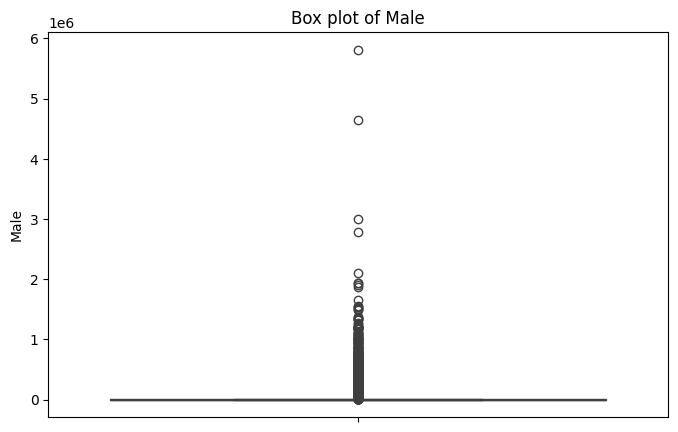

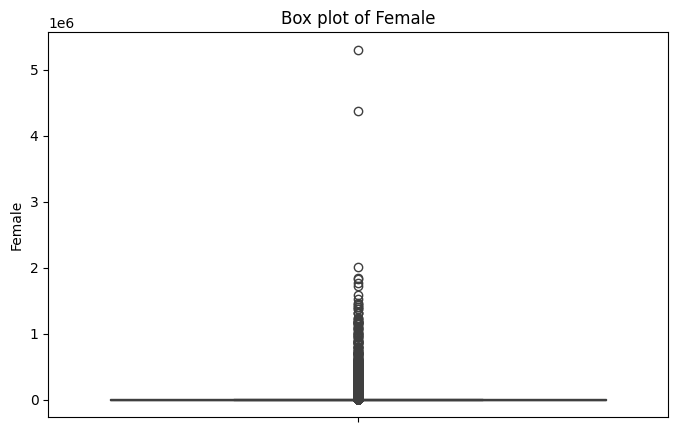

In [11]:
# Box plots for numerical columns
numerical_cols = ['Total', 'Male', 'Female']
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()



we can see outliers in box plots but we are not removing them because they are valid data points representing real employment figures in various districts of Pakistan. Removing them could lead to loss of important information and misrepresentation of the actual employment distribution.

In [12]:
data.head()

,Province,Division,District,Indicator,Area Type,Total,Male,Female
0,Balochistan,Kalat Division,Kalat,Working Age Population,Rural,130000.0,70000.0,59000.0
1,Balochistan,Kalat Division,Kalat,Working Age Population,Urban,28000.0,17000.0,12000.0
2,Balochistan,Kalat Division,Kalat,Labour Force,Rural,52600.0,49600.0,3100.0
3,Balochistan,Kalat Division,Kalat,Labour Force,Urban,10800.0,10600.0,300.0
4,Balochistan,Kalat Division,Kalat,Employed,Rural,49700.0,47400.0,2300.0


In [ ]:
# Sunburst Chart
fig = px.sunburst(data, path=['Province', 'Division', 'District','Indicator'], values='Total',color='Indicator' ,title='Sunburst Chart of Employment by Province, Division, and District')
fig.show()

# Conclusion
from the sunburst chart, we can observe the hierarchical distribution of employment across different administrative levels in Pakistan. The chart provides insights into how employment is distributed among provinces, divisions, and districts, as well as the breakdown by gender.the following observations can be made:
* The population is distributed accross provinces as:  Punjab > Sindh > Khyber Pakhtunkhwa > Balochistan.
* Within each province, divisions show varying levels of employment, with some divisions having significantly higher employment totals than others.
* The population of only Punjab is 287,991,216.8 similarly Sindh is 122,378,283.8, Khyber Pakhtunkhwa is 81,939,477 and Balochistan is 31,308,934.8.

There are many other insights that can be drawn from this sunburst chart regarding the distribution of employment across different regions and gender in Pakistan.You can further analyze specific segments of the chart to gain deeper insights into employment patterns at various administrative levels.